In [30]:
#Ruchi Bhavsar

import pandas as pd
from IPython.display import display
from graphviz import Source
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,roc_curve,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [31]:
ion = pd.read_csv('/content/ionosphere.data', index_col=0)
display(ion.head())

,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,0.85243.1,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,,,,,,,,,,,,,,,,,,,,,
1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In [32]:
df = pd.DataFrame(ion)
df['Class'] = df['g'].map({'g': 0, 'b': 1})
data = df.drop('g', axis = 1)

In [33]:
#1: Split the dataset into 80/20

X = data.drop('Class', axis = 1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)
dtc.fit(X_train,y_train)
y_train_pred = dtc.predict(X_train)
pred = dtc.predict(X_test)

In [35]:
# Evaluation Metrics

print('Accuracy : ', accuracy_score(y_test, pred))
print('\nPrecision : ', precision_score(y_test, pred))
print('\nRecall:  ',recall_score(y_test, pred))
print('\nClassification Report : \n',classification_report(y_test, pred))
print('Confusion Matrix : \n',confusion_matrix(y_test, pred))


Accuracy :  0.8571428571428571

Precision :  0.8333333333333334

Recall:   0.7692307692307693

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        44
           1       0.83      0.77      0.80        26

    accuracy                           0.86        70
   macro avg       0.85      0.84      0.84        70
weighted avg       0.86      0.86      0.86        70

Confusion Matrix : 
 [[40  4]
 [ 6 20]]


ROC CURVE


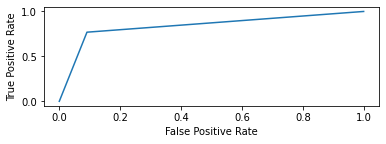


 PRECISION/RECALL CURVE


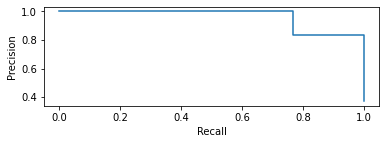

In [36]:
fpr, tpr, thr1 = roc_curve(y_test, pred)
pre, rec, thr2 = precision_recall_curve(y_test, pred)

print("ROC CURVE")
plt.figure()
plt.subplot(2,1,1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print("\n PRECISION/RECALL CURVE")
plt.figure()
plt.subplot(2,1,2)
plt.step(rec, pre)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

graph = Source(tree.export_graphviz(dtc, out_file=None, class_names=['good','bad'], impurity=False,filled=True))

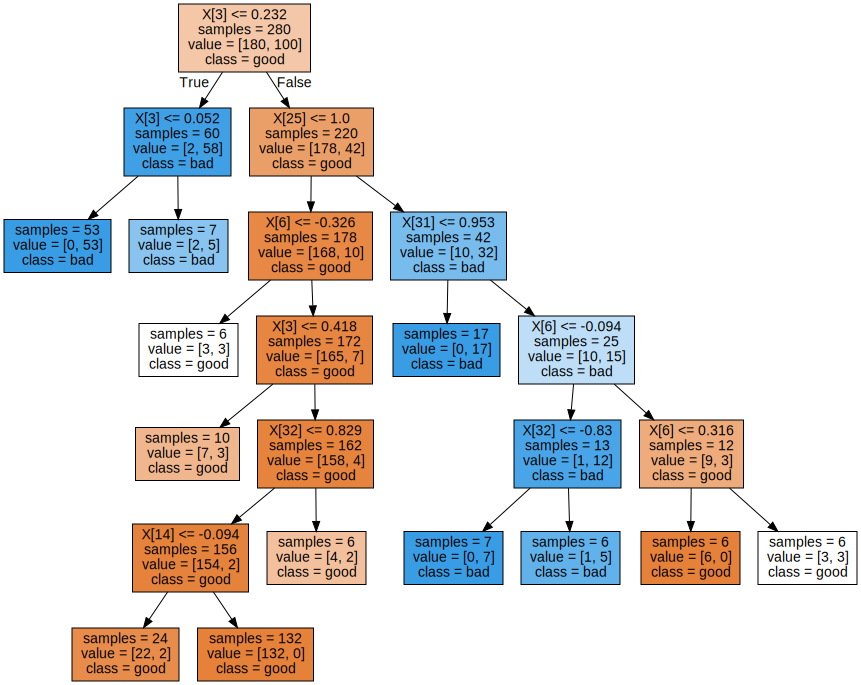

In [37]:
graph

Accuracy :  0.8142857142857143

Precision :  0.8823529411764706

Recall :  0.5769230769230769

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.95      0.87        44
           1       0.88      0.58      0.70        26

    accuracy                           0.81        70
   macro avg       0.84      0.77      0.78        70
weighted avg       0.83      0.81      0.80        70

Confusion Matrix : 
 [[42  2]
 [11 15]]

ROC CURVE


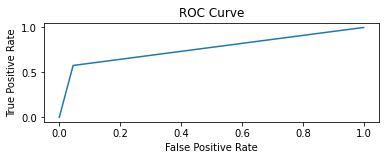


 PRECISION/RECALL CURVE


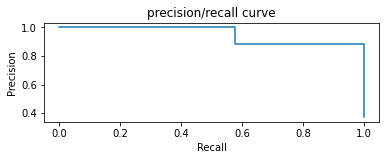

In [38]:
#Maximum depth of the tree as 1

model = DecisionTreeClassifier(max_depth=1, min_samples_leaf=6, min_samples_split=10)
model.fit(X_train,y_train)
predict = model.predict(X_test)

print('Accuracy : ', accuracy_score(y_test, predict))
print('\nPrecision : ', precision_score(y_test, predict))
print('\nRecall : ',recall_score(y_test, predict))
print('\nClassification Report : \n',classification_report(y_test, predict))
print('Confusion Matrix : \n', confusion_matrix(y_test, predict))

fpr1, tpr1, t1 = roc_curve(y_test, predict)
pre1, rec1, t2 = precision_recall_curve(y_test, predict)

print("\nROC CURVE")
plt.figure()
plt.subplot(2,1,1)
plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("\n PRECISION/RECALL CURVE")
plt.figure()
plt.subplot(2,1,2)
plt.step(rec1, pre1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('precision/recall curve')
plt.show()

graph = Source(tree.export_graphviz(model, out_file=None, class_names=['good','bad'], impurity=False,filled=True))

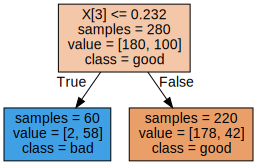

In [39]:
graph